In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)
# 그래프 크기 고정
plt.rcParams['figure.figsize'] = [10, 10]
font1 = {'family': 'Malgun Gothic', 'size': 24, 
         'color':  'Green'}
font2 = {'family': 'Malgun Gothic', 'size': 20, 'weight': 'bold',
         'color':  'blue'}
font3 = {'family': 'Malgun Gothic', 'size': 20, 'weight': 'bold',
         'color':  'darkred'}

In [64]:
result = pd.read_csv('./result/공원 위치, 면적, 인구.csv', sep=',',encoding='utf8')

In [65]:
result.head()

,공원,지역,공원주소,lat,lng,면적,세대,인구,인구 당 공원 면적
0,남산도시자연공원,중구,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377,2896887,63594,135321,21.407520
1,길동생태공원,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),37.540394,127.154779,80683,194602,462275,0.174535
2,서울대공원,과천시,경기도 과천시 대공원광장로 102,37.426449,127.019846,9132690,22631,61309,148.961653
3,서울숲,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),37.543072,127.041798,480994,136096,302695,1.589038
4,월드컵공원,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),37.571805,126.878907,2284085,178495,383494,5.955986


In [66]:
import folium
import json
geo_path = '서울시 구별 경계선.json'
geo_data = json.load(open (geo_path, encoding= 'utf-8'))

## 구별(+ 과천시) 공원 개수

In [67]:
plot1 = result.groupby('지역').count()[['공원']]
plot1.head()

,공원
지역,
강남구,7
강동구,7
강북구,4
강서구,9
과천시,1


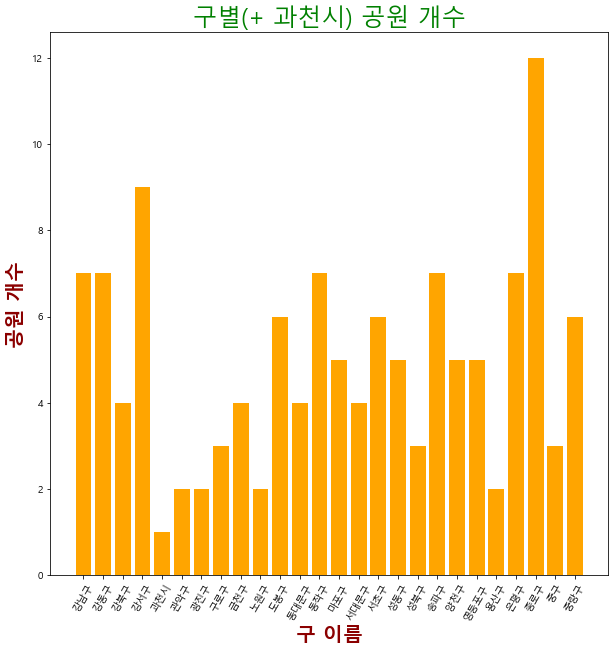

In [97]:
x = plot1.index
y = plot1.공원

plt.title('구별(+ 과천시) 공원 개수', fontdict=font1)
plt.xlabel('구 이름', fontdict=font2)
plt.ylabel('공원 개수', fontdict=font2)
plt.xticks(rotation=60)
plt.bar(x,y, color='orange')
plt.grid(True, color='red', alpha=0.5, linestyle='--')
plt.show()

## 공원 면적 vs 구 인구

In [68]:
plot2 = result.groupby(['지역']).sum()[['면적','인구']]
plot2.head()

,면적,인구
지역,,
강남구,3626398,3808595
강동구,1526387,3235925
강북구,3714902,1254200
강서구,2194152,5305824
과천시,9132690,61309


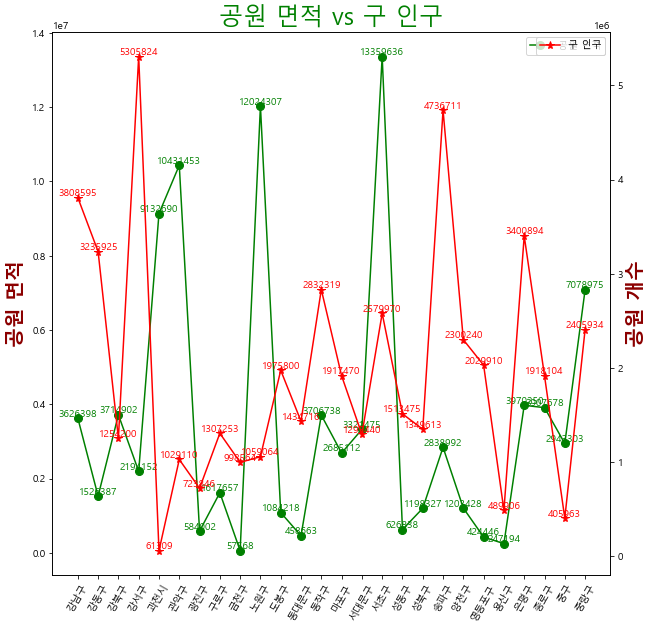

In [117]:
fig, ax1 = plt.subplots()

x = plot2.index
y1 = plot2.면적
y2 = plot2.인구

plt.title('공원 면적 vs 구 인구', fontdict=font1)

ax1.plot(x , y1, color='green',marker = 'o', markersize=8, label='공원 면적')
ax1.set_xticklabels(x, rotation=60)
ax1.set_ylabel('공원 면적' ,fontdict=font2)
plt.legend()

for i,v in enumerate(x):
    plt.text(v, y1[i], y1[i],            
             fontsize = 10, 
             color='green',
             horizontalalignment='center', 
             verticalalignment='bottom') 


ax2 = ax1.twinx()
ax2.plot(x, y2, color='red',marker = '*', markersize=8, label='구 인구')
ax2.set_ylabel('공원 개수' ,fontdict=font2)

for i,v in enumerate(x):
    plt.text(v, y2[i], y2[i],            
             fontsize = 10, 
             color='red',
             horizontalalignment='center', 
             verticalalignment='bottom') 

plt.legend()
plt.show()

## 공원 면적 vs 구 면적

In [69]:
gu = pd.read_csv('서울시 구 면적.txt',delimiter='\t',sep=',',encoding='utf8')
gu.rename(columns={
    '자치구':'지역'
},inplace=True)
gu = gu.iloc[2:,1:3]
gu.head()
 

,지역,면적
2,종로구,23.91
3,중구,9.96
4,용산구,21.87
5,성동구,16.86
6,광진구,17.06


In [70]:
area = pd.merge(result, gu, how = 'left', on = '지역')
area.rename(columns={
    '면적_x':'공원 면적',
    '면적_y':'구 면적'
},inplace=True)
area.set_index('공원',inplace=True)
area.head()

,지역,공원주소,lat,lng,공원 면적,세대,인구,인구 당 공원 면적,구 면적
공원,,,,,,,,,
남산도시자연공원,중구,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377,2896887,63594,135321,21.407520,9.96
길동생태공원,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),37.540394,127.154779,80683,194602,462275,0.174535,24.59
서울대공원,과천시,경기도 과천시 대공원광장로 102,37.426449,127.019846,9132690,22631,61309,148.961653,NaN
서울숲,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),37.543072,127.041798,480994,136096,302695,1.589038,16.86
월드컵공원,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),37.571805,126.878907,2284085,178495,383494,5.955986,23.85


In [71]:
area['구 면적']['서울대공원'] = 35.86

In [72]:
area

,지역,공원주소,lat,lng,공원 면적,세대,인구,인구 당 공원 면적,구 면적
공원,,,,,,,,,
남산도시자연공원,중구,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377,2896887,63594,135321,21.407520,9.96
길동생태공원,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),37.540394,127.154779,80683,194602,462275,0.174535,24.59
서울대공원,과천시,경기도 과천시 대공원광장로 102,37.426449,127.019846,9132690,22631,61309,148.961653,35.86
서울숲,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),37.543072,127.041798,480994,136096,302695,1.589038,16.86
월드컵공원,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),37.571805,126.878907,2284085,178495,383494,5.955986,23.85
...,...,...,...,...,...,...,...,...,...
숭인근린공원,종로구,서울특별시 종로구 숭인동 58,37.576442,127.017827,45615,74861,159842,0.285376,23.91
서일대뒷산공원,중랑구,서울특별시 중랑구 면목동 산19,37.587716,127.098782,631021,185109,400989,1.573662,18.5
용마도시자연공원(사가정공원),중랑구,서울특별시 중랑구 면목7동 산50,37.579762,127.095997,109635,185109,400989,0.273411,18.5


In [73]:
area.groupby('지역').sum().head(2)

,lat,lng,공원 면적,세대,인구,인구 당 공원 면적
지역,,,,,,
강남구,262.490242,889.476754,3626398,1638147,3808595,6.665131
강동구,262.829334,890.068174,1526387,1362214,3235925,3.301903


count()에서는 잘 나오던 '구 면적'이 sum()에서 안나오는 이유는 type이 int가 아니라 str이기 때문이다.

In [74]:
area['구 면적'] = area.apply(lambda r: float(r['구 면적']) , axis = 1)

In [139]:
plot3 = area.groupby(['지역','구 면적']).sum()[['공원 면적']]
plot3.reset_index('구 면적', inplace = True)
plot3.sort_values(by='공원 면적',inplace = True)
plot3.head()

,구 면적,공원 면적
지역,,
금천구,13.02,57568
용산구,21.87,247194
영등포구,24.55,424446
동대문구,14.22,458663
광진구,17.06,584002


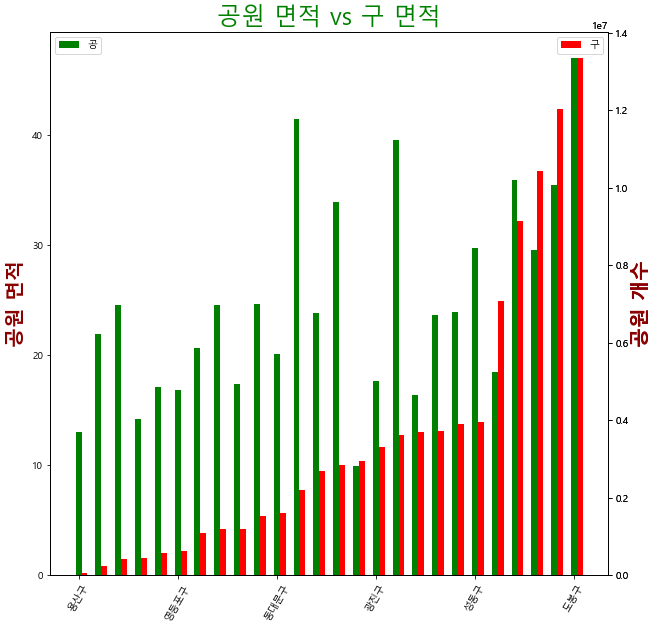

In [149]:
fig, ax1 = plt.subplots()

bar_width = 0.3

indices = np.arange(len(x))
x = plot3.index

y1 = plot3['구 면적']
y2 = plot3['공원 면적']

plt.title('공원 면적 vs 구 면적', fontdict=font1)

ax1.bar(indices , y1, bar_width, color='green')
ax1.set_xticklabels(x, rotation=60)
ax1.set_ylabel('공원 면적' ,fontdict=font2)
ax1.legend('공원 면적', loc = 2)

""" for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(fluctuations[i]) + '%', ha='right', va='center')
 """  
   
ax2 = ax1.twinx()
ax2.bar(indices + bar_width, y2, bar_width, color='red' )
ax2.set_xticklabels(x, rotation=60)
ax2.set_ylabel('공원 개수' ,fontdict=font2)
ax2.legend('구 면적',loc = 1)

# plot이랑 bar랑 그래프 위에 텍스트 띄우는 게 다르다
""" for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(fluctuations[i]) + '%', ha='right', va='center')
 """  

plt.show()

In [142]:
for i,v in enumerate(x):
    print(i,v)

0 금천구
1 용산구
2 영등포구
3 동대문구
4 광진구
5 성동구
6 도봉구
7 성북구
8 양천구
9 강동구
10 구로구
11 강서구
12 마포구
13 송파구
14 중구
15 서대문구
16 강남구
17 동작구
18 강북구
19 종로구
20 은평구
21 중랑구
22 과천시
23 관악구
24 노원구
25 서초구


In [130]:
indices

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26])

## 인구 당 공원 면적

In [150]:
plot4 = area.groupby(['지역','구 면적']).sum()[['인구 당 공원 면적']].head()
plot4.reset_index('구 면적', inplace = True)
plot4.sort_values(by='인구 당 공원 면적',inplace = True)
plot4.head()

,구 면적,인구 당 공원 면적
지역,,
강동구,24.59,3.301903
강서구,41.44,3.721829
강남구,39.50,6.665131
강북구,23.60,11.847878
과천시,35.86,148.961653


In [152]:
fig, ax1 = plt.subplots()

bar_width = 0.3

indices = np.arange(len(x))
x = plot4.index

y1 = plot4['구 면적']
y2 = plot4['인구 당 공원 면적']

plt.title('구 면적 vs 인구 당 공원 면적', fontdict=font1)

ax1.bar(indices , y1, bar_width, color='green')
ax1.set_xticklabels(x, rotation=60)
ax1.set_ylabel('인구 당 공원 면적' ,fontdict=font2)
ax1.legend('인구 당 공원 면적', loc = 2)


ax2 = ax1.twinx()
ax2.bar(indices + bar_width, y2, bar_width, color='red' )
ax2.set_xticklabels(x, rotation=60)
ax2.set_ylabel('구 면적' ,fontdict=font2)

 
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

## 구별 공원 지도에 표시하기

In [77]:
result.set_index('공원', inplace=True)

지도에 그리기 편하게 구별 공원 면적을 퍼센트로

In [78]:
result.head()

,지역,공원주소,lat,lng,면적,세대,인구,인구 당 공원 면적
공원,,,,,,,,
남산도시자연공원,중구,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377,2896887,63594,135321,21.407520
길동생태공원,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),37.540394,127.154779,80683,194602,462275,0.174535
서울대공원,과천시,경기도 과천시 대공원광장로 102,37.426449,127.019846,9132690,22631,61309,148.961653
서울숲,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),37.543072,127.041798,480994,136096,302695,1.589038
월드컵공원,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),37.571805,126.878907,2284085,178495,383494,5.955986


In [79]:
max_area = result['면적'].max()
result['면적 상대비교'] = result['면적'] / max_area * 100

In [80]:
park = folium.Map( [37.5502, 126.982], zoom_start= 11)

park.choropleth(geo_data = geo_data,
                    data = result,
                    columns = ['지역','인구'],
                    fill_color = 'PuRd',
                    key_on = 'id')

for i in result.index:
    # 너무 많이 나옴
    # folium.Marker( [result.lat[i], result.lng[i]], 
    # popup = [i],
    # icon = folium.Icon(color = 'green', icon = 'tree-conifer')).add_to(park)

    folium.CircleMarker( [result.lat[i], result.lng[i]] , radius = result['면적 상대비교'][i], color = 'green', fill_color = 'green').add_to(park)

park

## 강서구 지도에 공원 자세히 표시하기

In [81]:
kangseo = result[result['지역'] == '강서구']
kangseo.head()

,지역,공원주소,lat,lng,면적,세대,인구,인구 당 공원 면적,면적 상대비교
공원,,,,,,,,,
매화근린공원,강서구,서울특별시 강서구 등촌동 630-14,37.557583,126.861150,1980,266366,589536,0.003359,0.019000
허준공원,강서구,서울특별시 강서구 허준로5길 42,37.567987,126.852675,29843,266366,589536,0.050621,0.286379
궁산근린공원,강서구,서울특별시 강서구 가양동 산4-7,37.573565,126.838952,135002,266366,589536,0.228997,1.295503
꿩고개근린공원,강서구,서울특별시 강서구 방화동 산110,37.580159,126.815708,180000,266366,589536,0.305325,1.727311
방화근린공원,강서구,서울특별시 강서구 금낭화로 176(방화공원),37.581981,126.813228,72132,266366,589536,0.122354,0.692191


In [82]:
geo_data['features'][9]

{'type': 'Feature',
 'id': '강서구',
 'properties': {'code': '11160',
  'name': '강서구',
  'name_eng': 'Gangseo-gu',
  'base_year': '2013'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[126.79575768552907, 37.57881087633202],
    [126.80702115023597, 37.60123001013228],
    [126.82251438477105, 37.5880430810082],
    [126.85984199399667, 37.571847855292745],
    [126.89184663862764, 37.547373974997114],
    [126.88825757860099, 37.54079733630232],
    [126.86637464321238, 37.54859191094823],
    [126.86610073476395, 37.52699964144669],
    [126.84257291943153, 37.52373707805596],
    [126.8242331426722, 37.53788078753248],
    [126.77324417717703, 37.5459123450554],
    [126.76979180579352, 37.55139183008809],
    [126.79575768552907, 37.57881087633202]]]}}

In [83]:
kangseo_park = folium.Map( [37.5584, 126.8248], zoom_start= 12)

kangseo_park.choropleth(geo_data = geo_data['features'][9],
                    data = kangseo,
                    columns = ['지역','인구'],
                    fill_color = 'PuRd',
                    key_on = 'id')

for i in kangseo.index:
    # 너무 많이 나옴
    # folium.Marker( [kangseo.lat[i], kangseo.lng[i]], 
    # popup = [i],
    # icon = folium.Icon(color = 'green', icon = 'tree-conifer')).add_to(kangseo_park)

    folium.CircleMarker( [kangseo.lat[i], kangseo.lng[i]] , radius = kangseo['면적 상대비교'][i] * 3, color = 'green', fill_color = 'green').add_to(kangseo_park)

kangseo_park